In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

### load data

In [2]:
train_set = pd.read_pickle('assign_iid/train_set.pkl')

In [3]:
share_data = train_set[0:400] #share set provided by nodes
new_trainset = train_set[400:]
# worker
worker1 = pd.concat([train_set[train_set['new_label']=='True'][:3000],train_set[train_set['new_label']=='False'][:500]]).reset_index(drop=True)
worker2 = pd.concat([train_set[train_set['new_label']=='True'][3000:4000],train_set[train_set['new_label']=='False'][500:800]]).reset_index(drop=True)
worker3 = pd.concat([train_set[train_set['new_label']=='True'][4000:],train_set[train_set['new_label']=='False'][800:]]).reset_index(drop=True)

In [4]:
# worker1.to_pickle('assign_noniid/worker1.pkl')
# worker2.to_pickle('assign_noniid/worker2.pkl')
# worker3.to_pickle('assign_noniid/worker3.pkl')
# share_data.to_pickle('assign_noniid/share_data.pkl')
# new_trainset.to_pickle('assign_noniid/new_trainset.pkl')

In [5]:
worker1 = pd.read_pickle('assign_noniid/worker1.pkl')
worker2 = pd.read_pickle('assign_noniid/worker2.pkl')
worker3 = pd.read_pickle('assign_noniid/worker3.pkl')

In [6]:
train_set.count()

picture      10000
label        10000
dir          10000
new_label    10000
dtype: int64

Text(0, 0.5, 'Sample counts')

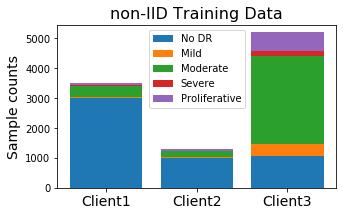

In [8]:
worker_counts = [worker1['label'].value_counts(), worker2['label'].value_counts(),worker3['label'].value_counts()]
count_set = []
for i in range(5):
    workc = []
    for j in worker_counts:
        workc.append(j[i])
    count_set.append(workc)


labels = ['Client1','Client2','Client3']
mylabels = ['No DR','Mild','Moderate','Severe','Proliferative']
    
bottom_list = [0,0,0]
for i in range(5):
    plt.bar(labels,count_set[i],label=mylabels[i],bottom=bottom_list)
    bottom_list[0] += count_set[i][0]
    bottom_list[1] += count_set[i][1]
    bottom_list[2] += count_set[i][2]

plt.legend()
plt.gcf().set_size_inches(5, 3)
plt.title('non-IID Training Data', fontsize=16)
plt.xticks(labels, labels, fontsize=14)
plt.ylabel('Sample counts', fontsize=14)

In [12]:
worker1.count()[0]+worker2.count()[0]+worker3.count()[0]

10000